# Regional Humanintarian EDA

**Reflection Question**

What does the data look like at a regional level? Are there any differences regionally across the years on total funding requirements on a world scale? What about funding recieved? People targeted? Total number of people in need? Is it normal? 

In [346]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [347]:
raw_data = pd.read_csv("../../Data/Raw Data.csv")

In [348]:
raw_data.head()

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric
0,2010,Afghanistan,Afghanistan,AFG,People targeted,"7,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
1,2010,Afghanistan,Afghanistan,AFG,Funding received,"223,824,925",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,"448,551,322",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements
3,2010,Afghanistan,Afghanistan,AFG,People targeted,"5,400,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
4,2010,Afghanistan,Afghanistan,AFG,Funding received,"345,246,607",Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN


In [349]:
#
country_df = raw_data[["Country Code"]].drop_duplicates(raw_data[["Country Code"]])
country_codes = country_df["Country Code"]

In [350]:
raw_data.describe()

,Year
count,1259.000000
mean,2017.396346
std,3.972203
min,2010.000000
25%,2014.000000
50%,2017.000000
75%,2021.000000
max,2024.000000


In [351]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   1259 non-null   int64 
 1   Plan                   1259 non-null   object
 2   Crisis Country         1259 non-null   object
 3   Country Code           1236 non-null   object
 4   Metric                 1259 non-null   object
 5   Value                  1259 non-null   object
 6   Standardised Plan      1259 non-null   object
 7   Appeal Type            974 non-null    object
 8   PiN Value for Dataviz  47 non-null     object
 9   OUSG Metric            619 non-null    object
dtypes: int64(1), object(9)
memory usage: 98.5+ KB


In [352]:
#create function that takes in a series (colum) and outpusts a series(column) that matches countries to regions
'''def country_to_region(country_series: pd.Series) -> pd.Series:
    region = []
    for item in country_series:
        if item in ["CUB", "COL", "DMA", "ECU", "HTI", "GTM", "HND", "NIC", "PER", "VEN", "SLV"]:
            region.append("Latin America and the Carribean")
        elif item in ["BDI","DJI", "ETH", "KEN", "LSO", "MDG", "MOZ", "MWI", "NAM", "SSD", "TZA", "UGA", "ZWE", "ZMN"]:
            region.append("Southern and Eastern Africa")
        elif item in ["AFG", "BEN", "BFA", "CMR", "TCD", "COG", "COD", "GMB", "MLI", "NER", "NGA", "SEN", "SLW"]:
            region.append("Middle East and North Africa")
        elif item in []:
            region.append("West and Central Africa")
        elif item in ["BGD", "IDN", "KGZ", "LKA", "MMR", "MNG", "NPL", "PAK", "PHL"]:
            region.append("Asia and the Pacific")
        elif item in ["UKR", "TUR", "PRK", "VUT"]:
            region.append("Europe")
        else:
            region.append("Null")
    return pd.Series(region)

'''    
    

'def country_to_region(country_series: pd.Series) -> pd.Series:\n    region = []\n    for item in country_series:\n        if item in ["CUB", "COL", "DMA", "ECU", "HTI", "GTM", "HND", "NIC", "PER", "VEN", "SLV"]:\n            region.append("Latin America and the Carribean")\n        elif item in ["BDI","DJI", "ETH", "KEN", "LSO", "MDG", "MOZ", "MWI", "NAM", "SSD", "TZA", "UGA", "ZWE", "ZMN"]:\n            region.append("Southern and Eastern Africa")\n        elif item in ["AFG", "BEN", "BFA", "CMR", "TCD", "COG", "COD", "GMB", "MLI", "NER", "NGA", "SEN", "SLW"]:\n            region.append("Middle East and North Africa")\n        elif item in []:\n            region.append("West and Central Africa")\n        elif item in ["BGD", "IDN", "KGZ", "LKA", "MMR", "MNG", "NPL", "PAK", "PHL"]:\n            region.append("Asia and the Pacific")\n        elif item in ["UKR", "TUR", "PRK", "VUT"]:\n            region.append("Europe")\n        else:\n            region.append("Null")\n    return pd.

In [353]:
#create a dictionary to store regions for each country code
region_dict = {
    # Latin America and the Caribbean
    "CUB": "Latin America and the Caribbean",
    "COL": "Latin America and the Caribbean",
    "DMA": "Latin America and the Caribbean",
    "ECU": "Latin America and the Caribbean",
    "HTI": "Latin America and the Caribbean",
    "GTM": "Latin America and the Caribbean",
    "HND": "Latin America and the Caribbean",
    "NIC": "Latin America and the Caribbean",
    "PER": "Latin America and the Caribbean",
    "VEN": "Latin America and the Caribbean",
    "SLV": "Latin America and the Caribbean",

    # Southern and Eastern Africa
    "BDI": "Southern and Eastern Africa",
    "DJI": "Southern and Eastern Africa",
    "ETH": "Southern and Eastern Africa",
    "KEN": "Southern and Eastern Africa",
    "LSO": "Southern and Eastern Africa",
    "MDG": "Southern and Eastern Africa",
    "MOZ": "Southern and Eastern Africa",
    "MWI": "Southern and Eastern Africa",
    "NAM": "Southern and Eastern Africa",
    "SSD": "Southern and Eastern Africa",
    "TZA": "Southern and Eastern Africa",
    "UGA": "Southern and Eastern Africa",
    "ZWE": "Southern and Eastern Africa",
    "ZMB": "Southern and Eastern Africa",
    "SOM": "Southern and Eastern Africa",

    # West and Central Africa
    "BEN": "West and Central Africa",
    "BFA": "West and Central Africa",
    "CMR": "West and Central Africa",
    "CAF": "West and Central Africa",
    "TCD": "West and Central Africa",
    "CIV": "West and Central Africa",
    "COG": "West and Central Africa",
    "COD": "West and Central Africa",
    "GMB": "West and Central Africa",
    "LBR": "West and Central Africa",
    "MLI": "West and Central Africa",
    "MRT": "West and Central Africa",
    "NER": "West and Central Africa",
    "NGA": "West and Central Africa",
    "SEN": "West and Central Africa",
    "SLE": "West and Central Africa",
    "TGO": "West and Central Africa",

    # Asia and the Pacific
    "AFG": "Asia and the Pacific",
    "BGD": "Asia and the Pacific",
    "IDN": "Asia and the Pacific",
    "KGZ": "Asia and the Pacific",
    "LKA": "Asia and the Pacific",
    "MMR": "Asia and the Pacific",
    "MNG": "Asia and the Pacific",
    "NPL": "Asia and the Pacific",
    "PAK": "Asia and the Pacific",
    "PHL": "Asia and the Pacific",
    "PRK": "Asia and the Pacific",
    "VUT": "Asia and the Pacific",

    # Middle East and North Africa
    "IRN": "Middle East and North Africa",
    "IRQ": "Middle East and North Africa",
    "JOR": "Middle East and North Africa",
    "LBN": "Middle East and North Africa",
    "LBY": "Middle East and North Africa",
    "PSE": "Middle East and North Africa",
    "SDN": "Middle East and North Africa",
    "SYR": "Middle East and North Africa",
    "YEM": "Middle East and North Africa",

    # Europe
    "UKR": "Europe",
    "TUR": "Europe",
}

In [354]:
#use map function to add a region column that matches the country codes as keys to the regions as values
raw_data["Region"] = raw_data["Country Code"].map(region_dict)

In [355]:
raw_data["Region"]

0                  Asia and the Pacific
1                  Asia and the Pacific
2                  Asia and the Pacific
3                  Asia and the Pacific
4                  Asia and the Pacific
                     ...               
1254       Middle East and North Africa
1255       Middle East and North Africa
1256                                NaN
1257                             Europe
1258    Latin America and the Caribbean
Name: Region, Length: 1259, dtype: object

In [356]:
raw_data.head()

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric,Region
0,2010,Afghanistan,Afghanistan,AFG,People targeted,"7,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need,Asia and the Pacific
1,2010,Afghanistan,Afghanistan,AFG,Funding received,"223,824,925",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received,Asia and the Pacific
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,"448,551,322",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements,Asia and the Pacific
3,2010,Afghanistan,Afghanistan,AFG,People targeted,"5,400,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need,Asia and the Pacific
4,2010,Afghanistan,Afghanistan,AFG,Funding received,"345,246,607",Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN,Asia and the Pacific


In [357]:
#find null values
raw_data.isnull().sum()

Year                        0
Plan                        0
Crisis Country              0
Country Code               23
Metric                      0
Value                       0
Standardised Plan           0
Appeal Type               285
PiN Value for Dataviz    1212
OUSG Metric               640
Region                     25
dtype: int64

In [358]:
#drop uneeded columns and rows with null values from region column. Value is type object - change to type float, turn to str and remove commas, then convert to float
cleaned_data = raw_data.drop(columns=["PiN Value for Dataviz", "OUSG Metric"])
cleaned_data = cleaned_data.dropna(subset="Region")
cleaned_data["Value"] = cleaned_data["Value"].str.replace(",", "", regex=True).astype(float)

In [359]:
cleaned_data

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,Region
0,2010,Afghanistan,Afghanistan,AFG,People targeted,7.800000e+06,Afghanistan,Consolidated Appeal Process (CAP),Asia and the Pacific
1,2010,Afghanistan,Afghanistan,AFG,Funding received,2.238249e+08,Afghanistan,Consolidated Appeal Process (CAP),Asia and the Pacific
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,4.485513e+08,Afghanistan,Consolidated Appeal Process (CAP),Asia and the Pacific
3,2010,Afghanistan,Afghanistan,AFG,People targeted,5.400000e+06,Afghanistan,Consolidated Appeal Process (CAP),Asia and the Pacific
4,2010,Afghanistan,Afghanistan,AFG,Funding received,3.452466e+08,Afghanistan,Consolidated Appeal Process (CAP),Asia and the Pacific
...,...,...,...,...,...,...,...,...,...
1253,2024,South Sudan,South Sudan,SSD,Funding requirements,9.812949e+08,South Sudan,RRP,Southern and Eastern Africa
1254,2024,Sudan,Sudan,SDN,Funding requirements,2.813216e+08,Sudan,RRP,Middle East and North Africa
1255,2024,Syria (3RP),Syria,SYR,Funding requirements,5.540000e+09,Syria (3RP),RRP,Middle East and North Africa
1257,2024,Ukraine,Ukraine,UKR,Funding requirements,1.038000e+09,Ukraine,RRP,Europe


In [360]:
#create new df with only the regions, year, metric, and values

new_df = cleaned_data[["Year","Region", "Metric", "Value"]]

In [361]:
new_df

,Year,Region,Metric,Value
0,2010,Asia and the Pacific,People targeted,7.800000e+06
1,2010,Asia and the Pacific,Funding received,2.238249e+08
2,2010,Asia and the Pacific,Funding requirements,4.485513e+08
3,2010,Asia and the Pacific,People targeted,5.400000e+06
4,2010,Asia and the Pacific,Funding received,3.452466e+08
...,...,...,...,...
1253,2024,Southern and Eastern Africa,Funding requirements,9.812949e+08
1254,2024,Middle East and North Africa,Funding requirements,2.813216e+08
1255,2024,Middle East and North Africa,Funding requirements,5.540000e+09
1257,2024,Europe,Funding requirements,1.038000e+09


In [362]:
new_df.isna().sum()


Year      0
Region    0
Metric    0
Value     0
dtype: int64

In [363]:
#change Metric to string

new_df["Metric"] = new_df["Metric"].astype(str)


/var/folders/k0/k5r4gt214pvgqxc8cml0zfv40000gn/T/ipykernel_39648/1061994141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Metric"] = new_df["Metric"].astype(str)


In [364]:
region_df = new_df.pivot_table(index=["Region", "Year"], columns="Metric", values="Value")

In [365]:
region_df

Metric                        Funding received  Funding requirements  \
Region                  Year                                           
Asia and the Pacific    2010      3.516785e+08          5.925776e+08   
                        2011               NaN          8.710000e+08   
                        2013      5.136511e+07          1.454678e+08   
                        2014      5.030880e+07          9.423185e+07   
                        2015      5.351915e+07          1.263437e+08   
...                                        ...                   ...   
West and Central Africa 2020      3.631000e+08          4.210167e+08   
                        2021               NaN                   NaN   
                        2022               NaN          7.774734e+08   
                        2023               NaN          9.097102e+08   
                        2024               NaN          9.210701e+08   

Metric                        People in need  People targeted  
Region                  Year                                   
Asia and the Pacific    2010    6.794444e+06     7.333333e+06  
                        2011    1.069000e+07              NaN  
                        2013    1.415000e+07              NaN  
                        2014             NaN              NaN  
                        2015    7.600000e+06              NaN  
...                                      ...              ...  
West and Central Africa 2020    4.816667e+06              NaN  
                        2021    6.249307e+06              NaN  
                        2022    7.312363e+06              NaN  
                        2023    7.738542e+06              NaN  
                        2024    7.226059e+06              NaN  

[67 rows x 4 columns]

Text(0.5, 1.0, 'People in Need vs Funding Requirements')

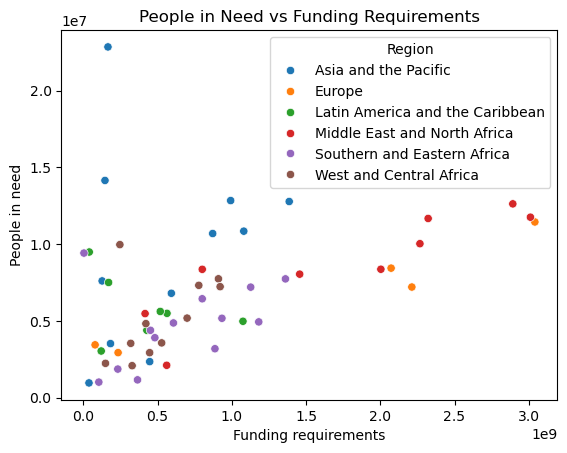

In [366]:
#scatter plot for people in need 
sns.scatterplot(region_df, x="Funding requirements", y="People in need", hue="Region")

plt.title("People in Need vs Funding Requirements")


In [367]:
#store new dfs for each metric
regional_funding_requirements = new_df[new_df["Metric"] == "Funding requirements"]
regional_funding_received = new_df[new_df["Metric"] == "Funding received"]
regional_people_targeted = new_df[new_df["Metric"] == "People targeted"]
regional_people_in_need = new_df[new_df["Metric"] == "People in need"]

In [368]:
print("People in need dimensions are: ", regional_people_in_need.shape)
print("People targeted dimensions are: ",regional_people_targeted.shape)
print("funding received diminesions are: ", regional_funding_received.shape)
print("Funding required dimensions are: ",regional_funding_requirements.shape)

People in need dimensions are:  (395, 4)
People targeted dimensions are:  (53, 4)
funding received diminesions are:  (300, 4)
Funding required dimensions are:  (486, 4)


In [369]:
regional_funding_requirements

,Year,Region,Metric,Value
2,2010,Asia and the Pacific,Funding requirements,4.485513e+08
5,2010,Asia and the Pacific,Funding requirements,4.744284e+08
8,2010,Asia and the Pacific,Funding requirements,4.064000e+08
11,2010,Asia and the Pacific,Funding requirements,4.167000e+08
14,2010,Asia and the Pacific,Funding requirements,3.388000e+08
...,...,...,...,...
1253,2024,Southern and Eastern Africa,Funding requirements,9.812949e+08
1254,2024,Middle East and North Africa,Funding requirements,2.813216e+08
1255,2024,Middle East and North Africa,Funding requirements,5.540000e+09
1257,2024,Europe,Funding requirements,1.038000e+09


In [370]:
#rename columns so that value columns are now refered to by specific metric
regional_funding_requirements = regional_funding_requirements.rename(columns={"Value": "Funding Requirements"})
regional_funding_received = regional_funding_received.rename(columns={"Value": "Funding Received"})
regional_people_in_need = regional_people_in_need.rename(columns={"Value": "People in Need"})
regional_people_targeted = regional_people_targeted.rename(columns={"Value": "People Targeted"})


Text(0.5, 0, 'Year')

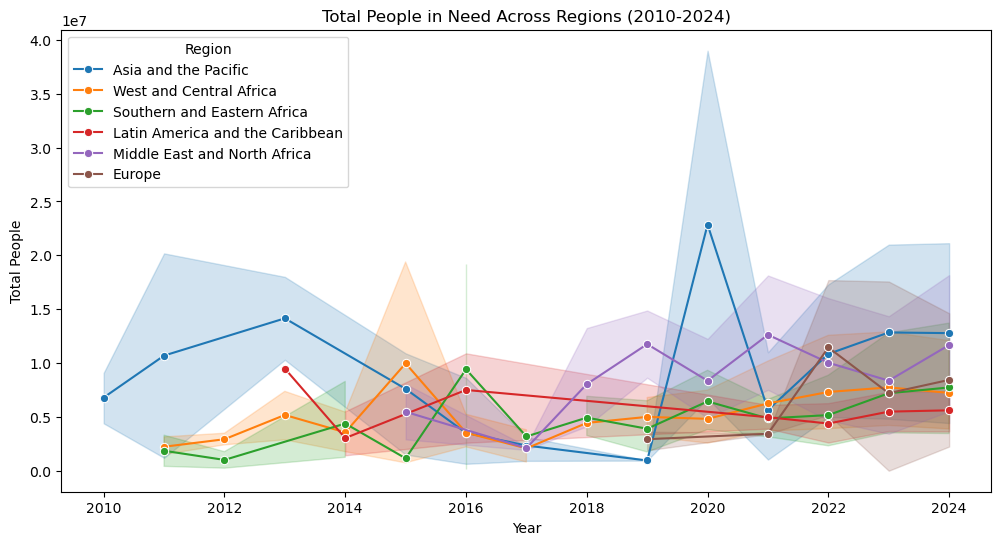

In [371]:
#Plot line graph to show change in people in need over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_people_in_need, x="Year", y="People in Need", hue="Region", marker="o")

plt.title("Total People in Need Across Regions (2010-2024)")
plt.ylabel("Total People")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

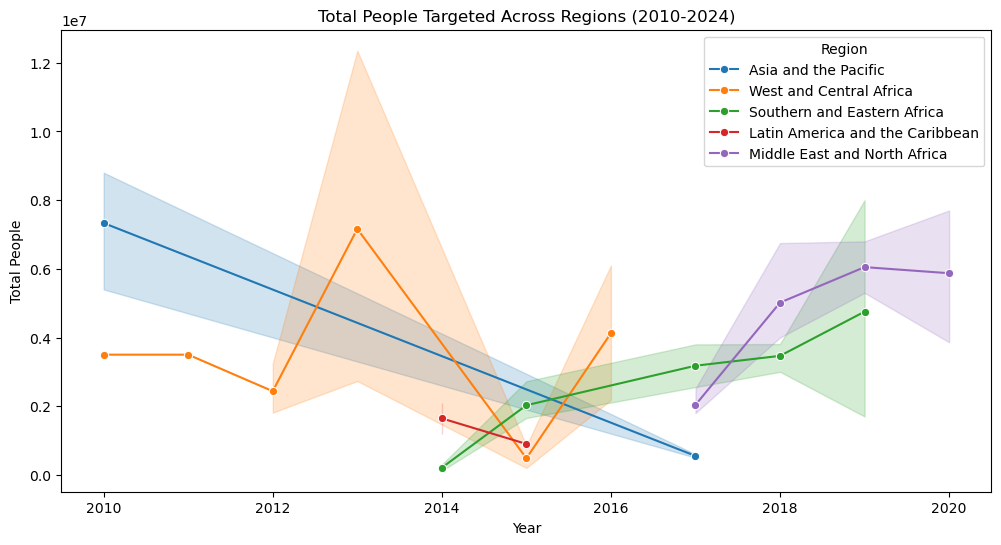

In [372]:
#Plot line graph to show change in people targeted over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_people_targeted, x="Year", y="People Targeted", hue="Region", marker="o")

plt.title("Total People Targeted Across Regions (2010-2024)")
plt.ylabel("Total People")
plt.xlabel("Year")

In [373]:
#check for original count of people targeted metric
people_targeted_total = raw_data[raw_data['Metric']== 'People targeted']

In [374]:
#people targeted missing years of data for certain regions
people_targeted_total

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric,Region
0,2010,Afghanistan,Afghanistan,AFG,People targeted,"7,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need,Asia and the Pacific
3,2010,Afghanistan,Afghanistan,AFG,People targeted,"5,400,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need,Asia and the Pacific
6,2010,Afghanistan,Afghanistan,AFG,People targeted,"8,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need,Asia and the Pacific
44,2010,Burkina Faso,Burkina Faso,BFA,People targeted,"3,500,000",Burkina Faso,Consolidated Appeal Process (CAP),NaN,People in need,West and Central Africa
47,2011,Burkina Faso,Burkina Faso,BFA,People targeted,"3,500,000",Burkina Faso,Consolidated Appeal Process (CAP),NaN,People in need,West and Central Africa
121,2012,Central African Republic,Central African Republic,CAF,People targeted,"1,621,183",Central African Republic,Consolidated Appeal Process (CAP),NaN,People in need,West and Central Africa
124,2012,Central African Republic,Central African Republic,CAF,People targeted,"1,920,000",Central African Republic,Consolidated Appeal Process (CAP),NaN,People in need,West and Central Africa
125,2012,Central African Republic,Central African Republic,CAF,People targeted,"1,600,000",Central African Republic,Consolidated Appeal Process (CAP),NaN,People in need,West and Central Africa
151,2012,Chad,Chad,TCD,People targeted,"2,283,310",Chad,Consolidated Appeal Process (CAP),NaN,People in need,West and Central Africa
154,2012,Chad,Chad,TCD,People targeted,"2,989,000",Chad,Consolidated Appeal Process (CAP),NaN,People in need,West and Central Africa


Text(0.5, 1.0, 'Distribution of People Targeted by Region')

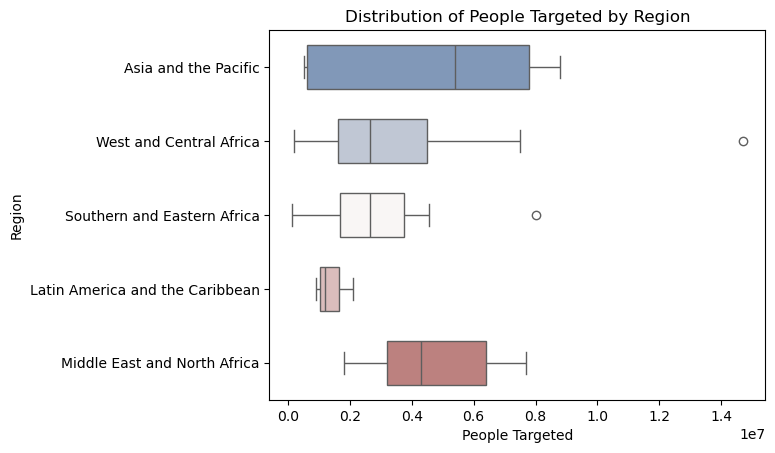

In [375]:
#plot people targeted with horizontal boxes 
sns.boxplot(regional_people_targeted, x="People Targeted", y="Region", hue="Region", width=.6, palette="vlag")

plt.title("Distribution of People Targeted by Region")


In [376]:
regional_funding_requirements

,Year,Region,Metric,Funding Requirements
2,2010,Asia and the Pacific,Funding requirements,4.485513e+08
5,2010,Asia and the Pacific,Funding requirements,4.744284e+08
8,2010,Asia and the Pacific,Funding requirements,4.064000e+08
11,2010,Asia and the Pacific,Funding requirements,4.167000e+08
14,2010,Asia and the Pacific,Funding requirements,3.388000e+08
...,...,...,...,...
1253,2024,Southern and Eastern Africa,Funding requirements,9.812949e+08
1254,2024,Middle East and North Africa,Funding requirements,2.813216e+08
1255,2024,Middle East and North Africa,Funding requirements,5.540000e+09
1257,2024,Europe,Funding requirements,1.038000e+09


Text(0.5, 0, 'Year')

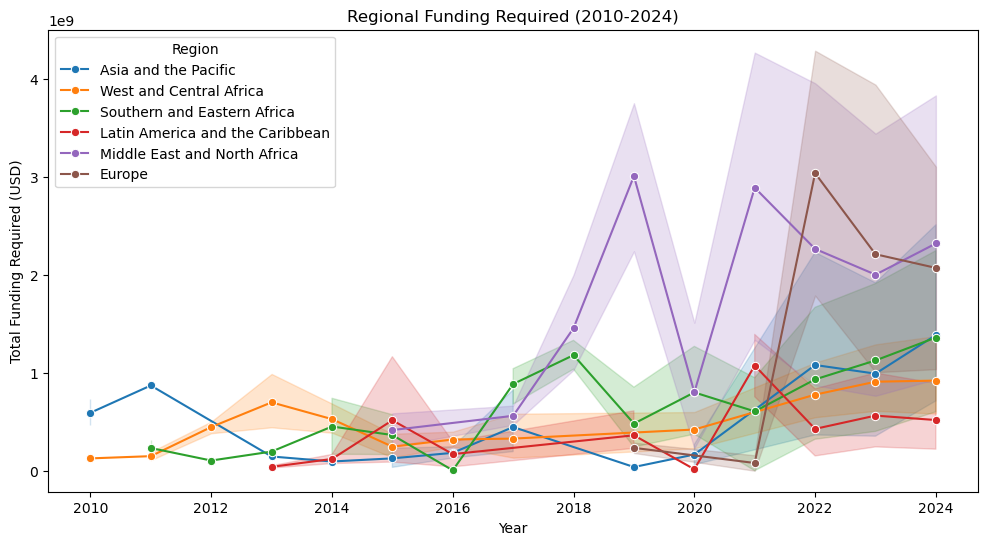

In [377]:
#Plot line graph to show change in funding required over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_funding_requirements, x="Year", y="Funding Requirements", hue="Region", marker="o")

plt.title("Regional Funding Required (2010-2024)")
plt.ylabel("Total Funding Required (USD)")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

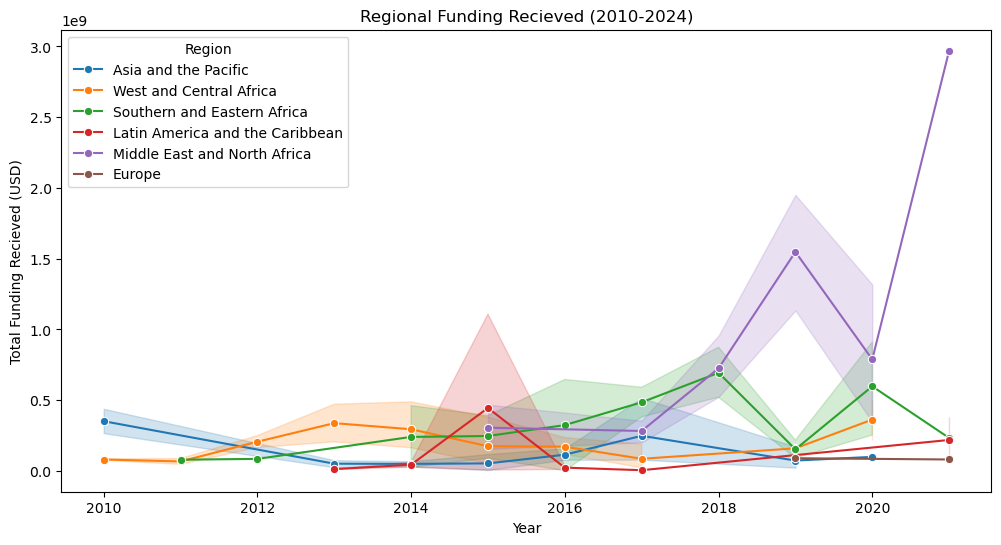

In [378]:
#Plot line graph to show change in funding recieved over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_funding_received, x="Year", y="Funding Received", hue="Region", marker="o")

plt.title("Regional Funding Recieved (2010-2024)")
plt.ylabel("Total Funding Recieved (USD)")
plt.xlabel("Year")

In [398]:
regional_funding_requirements["Cumulative Funding Requiremnets"] = regional_funding_requirements.groupby(["Region", "Year"])["Funding Requirements"].cumsum()

regional_funding_requirements

,Year,Region,Metric,Funding Requirements,Cumulative Funding Requiremnets
2,2010,Asia and the Pacific,Funding requirements,4.485513e+08,4.485513e+08
5,2010,Asia and the Pacific,Funding requirements,4.744284e+08,9.229797e+08
8,2010,Asia and the Pacific,Funding requirements,4.064000e+08,1.329380e+09
11,2010,Asia and the Pacific,Funding requirements,4.167000e+08,1.746080e+09
14,2010,Asia and the Pacific,Funding requirements,3.388000e+08,2.084880e+09
...,...,...,...,...,...
1253,2024,Southern and Eastern Africa,Funding requirements,9.812949e+08,8.166792e+09
1254,2024,Middle East and North Africa,Funding requirements,2.813216e+08,1.071643e+10
1255,2024,Middle East and North Africa,Funding requirements,5.540000e+09,1.625643e+10
1257,2024,Europe,Funding requirements,1.038000e+09,4.145703e+09


<Axes: xlabel='Year', ylabel='Cumulative Funding Requiremnets'>

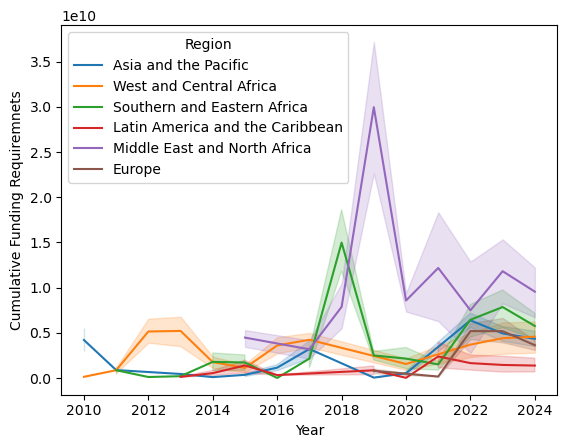

In [401]:
sns.lineplot(data=regional_funding_requirements, x="Year", y="Cumulative Funding Requiremnets", hue="Region")

In [404]:
#totals for each in each region

cummulative_df = new_df.pivot_table(index=["Region", "Year"], columns="Metric", values="Value", aggfunc="sum")

In [405]:
cummulative_df

Metric                        Funding received  Funding requirements  \
Region                  Year                                           
Asia and the Pacific    2010      4.923500e+09          9.481242e+09   
                        2011               NaN          8.710000e+08   
                        2013      2.568256e+08          8.728066e+08   
                        2014      1.006176e+08          9.423185e+07   
                        2015      2.140766e+08          5.053747e+08   
...                                        ...                   ...   
West and Central Africa 2020      7.262000e+08          2.526100e+09   
                        2021               NaN                   NaN   
                        2022               NaN          6.997261e+09   
                        2023               NaN          8.187392e+09   
                        2024               NaN          8.289631e+09   

Metric                        People in need  People targeted  
Region                  Year                                   
Asia and the Pacific    2010      61150000.0       22000000.0  
                        2011      21380000.0              NaN  
                        2013      28300000.0              NaN  
                        2014             NaN              NaN  
                        2015      22800000.0              NaN  
...                                      ...              ...  
West and Central Africa 2020      28900000.0              NaN  
                        2021      56243764.0              NaN  
                        2022      65811264.0              NaN  
                        2023      69646880.0              NaN  
                        2024      65034530.0              NaN  

[67 rows x 4 columns]

In [382]:
plt.figure()
plt.figure(figsize=(12, 6))

pivot_funding.plot(kind="scatter", marker="o")

plt.title("Total Funding Required by Region (2010-2024)")
plt.xlabel("Year")
plt.ylabel("Total Funding Required (USD)")
plt.legend(title="Region")
plt.show()

#funding_req_group.sum(numeric_only=True).plot(kind="bar", figsize=(10, 6), stacked=True)

ValueError: scatter requires an x and y column

<Figure size 640x480 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [383]:
funding_rec_group = regional_funding_received.groupby(["Region", "Year"])
funding_rec_group.mean(numeric_only=True)

Funding Received
Region                          Year                  
Asia and the Pacific            2010      3.516785e+08
                                2013      5.136511e+07
                                2014      5.030880e+07
                                2015      5.351915e+07
                                2016      1.148170e+08
                                2017      2.485879e+08
                                2019      7.357551e+07
                                2020      9.953330e+07
Europe                          2019      9.007500e+07
                                2021      8.110000e+07
Latin America and the Caribbean 2013      1.273010e+07
                                2014      4.432950e+07
                                2015      4.452136e+08
                                2016      2.360000e+07
                                2017      5.357651e+06
                                2021      2.190500e+08
Middle East and North Africa    2015      3.057862e+08
                                2017      2.826275e+08
                                2018      7.252134e+08
                                2019      1.548331e+09
                                2020      7.882882e+08
                                2021      2.970000e+09
Southern and Eastern Africa     2011      7.948750e+07
                                2012      8.540000e+07
                                2014      2.406347e+08
                                2015      2.470899e+08
                                2016      3.241411e+08
                                2017      4.853275e+08
                                2018      6.941614e+08
                                2019      1.531422e+08
                                2020      5.980559e+08
                                2021      2.333000e+08
West and Central Africa         2010      8.097434e+07
                                2011      6.734138e+07
                                2012      2.066080e+08
                                2013      3.378452e+08
                                2014      2.947972e+08
                                2015      1.747638e+08
                                2016      1.714824e+08
                                2017      8.602025e+07
                                2019      1.600000e+08
                                2020      3.631000e+08

**Reflection**

What does the data look like at a regional level? Are there any differences regionally across the years on total funding requirements on a world scale? What about funding recieved? People targeted? Total number of people in need? Is it normal? 

